In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import math

In [2]:
# Metrics
def index_difficulty(d, w):
  return math.log2((2*d) / w)

def index_performance(id, mt):
  return id / mt

def get_id_col(df):
  return df.apply(lambda row: index_difficulty(row['A'], row['w']), axis=1)
# ============================================================================

# File reading / analysis
def get_name_device_mode(filename):
  name, a, b = filename.lower().split("/")[-1].split('_')[:3]

  # some file were named "name_device_mode" and some "name_mode_device"
  if a in ["tablet", "mouse"]:
    device = a
    mode = b
  else:
    device = b
    mode = a
  return name, device, mode

def analyse_file(filename):
  df = pd.read_csv(filename, skiprows=2)
  avg_click = df['clickTime'].mean()
  total_time = df['clickTime'].sum()
  errors = df['currentNumberOfErrors'].array[-1]
  name, device, mode = get_name_device_mode(filename)

  # give info for combined df
  df["device"] = device
  df["mode"] = mode

  return df, [name, device, mode, avg_click, total_time, errors]
# ============================================================================

In [3]:
# reading all csv files in "folder_name" make a table with total time / avg_click / errors
# also make combined df which contains every click data of all csv files
folder_name = 'data/'

table = []
combined_df = pd.DataFrame()
for filename in glob.glob(f'{folder_name}*.csv'):
  df, row = analyse_file(filename)
  table.append(row)
  combined_df = pd.concat([combined_df, df])

# add id metric
combined_df["ID"] = get_id_col(combined_df)

# make df from table
df = pd.DataFrame(table, columns=["Name", "Device", "Mode", "AvgTime", "Total Time", "Errors"])

In [5]:
df.sort_values(by=["Name", "Device", "Mode"])

,Name,Device,Mode,AvgTime,Total Time,Errors
5,alex,mouse,bubble,1.125529,272.378,3
40,alex,mouse,normal,1.168946,282.885,12
4,alex,tablet,bubble,1.153112,279.053,35
41,alex,tablet,normal,1.246343,301.615,45
25,ana,mouse,bubble,1.429256,345.880,1
35,ana,mouse,normal,1.238508,299.719,8
34,ana,tablet,bubble,1.350161,326.739,6
16,ana,tablet,normal,1.516591,367.015,33
6,gabriel,mouse,bubble,1.094678,264.912,3
37,gabriel,mouse,normal,1.226008,296.694,9


In [6]:
set(combined_df["ID"])

{4.0,
 4.415037499278844,
 4.584962500721156,
 5.0,
 5.415037499278844,
 5.584962500721156,
 6.0}

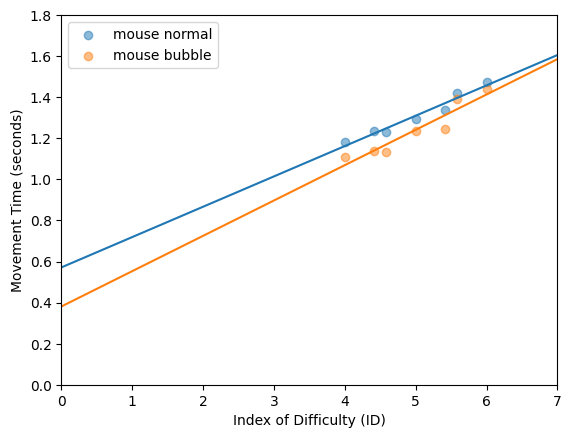

In [8]:
# x_axis = [0, 7]
# y_axis = [0, 1.8]
# tmp = combined_df.groupby(["device", "mode", "ID"]).mean()
# extended_x = np.linspace(*x_axis, 100)

# for d in ["mouse", "tablet"]:
#   for m in ["normal", "bubble"]:
#     x = tmp.T[d][m].T.index.to_numpy()
#     y = tmp.T[d][m].T["clickTime"].to_numpy()
#     plt.scatter(x, y, label=f"{d} {m}", alpha=0.5)
#     p = np.polyfit(x, y, 1)
#     plt.plot(extended_x, np.polyval(p, extended_x))#, label=f"{d} {m}")

# plt.legend()
# plt.axis(x_axis + y_axis)
# plt.xlabel("Index of Difficulty (ID)")
# plt.ylabel("Movement Time (seconds)")
# plt.show()
x_axis = [0, 7]
y_axis = [0, 1.8]
tmp = combined_df.groupby(["device", "mode", "ID"]).mean()
extended_x = np.linspace(*x_axis, 100)

for d in ["mouse"]:
  for m in ["normal", "bubble"]:
    x = tmp.T[d][m].T.index.to_numpy()
    y = tmp.T[d][m].T["clickTime"].to_numpy()
    plt.scatter(x, y, label=f"{d} {m}", alpha=0.5)
    p = np.polyfit(x, y, 1)
    plt.plot(extended_x, np.polyval(p, extended_x))#, label=f"{d} {m}")

plt.legend()
plt.axis(x_axis + y_axis)
plt.xlabel("Index of Difficulty (ID)")
plt.ylabel("Movement Time (seconds)")
plt.show()

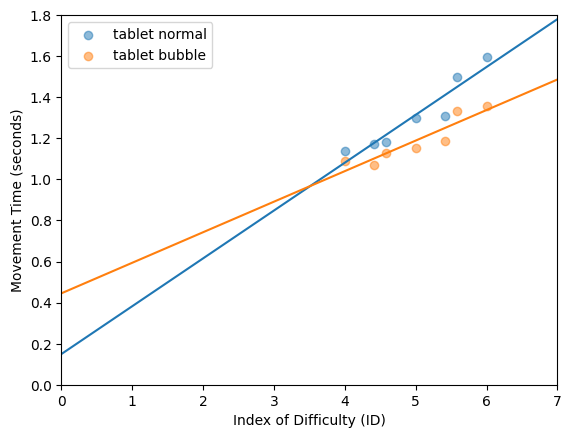

In [7]:
x_axis = [0, 7]
y_axis = [0, 1.8]
tmp = combined_df.groupby(["device", "mode", "ID"]).mean()
extended_x = np.linspace(*x_axis, 100)

for d in ["tablet"]:
  for m in ["normal", "bubble"]:
    x = tmp.T[d][m].T.index.to_numpy()
    y = tmp.T[d][m].T["clickTime"].to_numpy()
    plt.scatter(x, y, label=f"{d} {m}", alpha=0.5)
    p = np.polyfit(x, y, 1)
    plt.plot(extended_x, np.polyval(p, extended_x))#, label=f"{d} {m}")

plt.legend()
plt.axis(x_axis + y_axis)
plt.xlabel("Index of Difficulty (ID)")
plt.ylabel("Movement Time (seconds)")
plt.show()

In [9]:
# stats for groups
df.groupby(["Device", "Mode"]).describe()

AvgTime                                                    \
                  count      mean       std       min       25%       50%   
Device Mode                                                                 
bubble tablette     1.0  1.477145       NaN  1.477145  1.477145  1.477145   
mouse  bubble      11.0  1.239757  0.161037  1.087525  1.117060  1.143483   
       normal      11.0  1.306471  0.145964  1.168946  1.232258  1.259566   
normal tablette     1.0  1.720872       NaN  1.720872  1.720872  1.720872   
tablet bubble      10.0  1.180374  0.126363  0.955058  1.113730  1.203331   
       normal      10.0  1.310438  0.152996  1.099004  1.218383  1.285326   

                                    Total Time              ...             \
                      75%       max      count        mean  ...        75%   
Device Mode                                                 ...              
bubble tablette  1.477145  1.477145        1.0  357.469000  ...  357.46900   
mouse  bubble    1.365597  1.545640       11.0  300.021273  ...  330.47450   
       normal    1.325347  1.697496       11.0  316.165909  ...  320.73400   
normal tablette  1.720872  1.720872        1.0  416.451000  ...  416.45100   
tablet bubble    1.266735  1.350161       10.0  285.650400  ...  306.54975   
       normal    1.372815  1.583219       10.0  317.125900  ...  332.22125   

                         Errors                                          \
                     max  count       mean        std   min   25%   50%   
Device Mode                                                               
bubble tablette  357.469    1.0  14.000000        NaN  14.0  14.0  14.0   
mouse  bubble    374.045   11.0   8.545455  12.620330   1.0   2.5   4.0   
       normal    410.794   11.0  24.272727  18.574665   2.0   9.0  19.0   
normal tablette  416.451    1.0  21.000000        NaN  21.0  21.0  21.0   
tablet bubble    326.739   10.0  44.300000  36.584909   6.0  22.0  32.0   
       normal    383.139   10.0  86.300000  60.635615  33.0  45.5  53.5   

                                
                    75%    max  
Device Mode                     
bubble tablette   14.00   14.0  
mouse  bubble      9.50   45.0  
       normal     38.50   53.0  
normal tablette   21.00   21.0  
tablet bubble     47.75  113.0  
       normal    115.75  203.0  

[6 rows x 24 columns]

<AxesSubplot:>

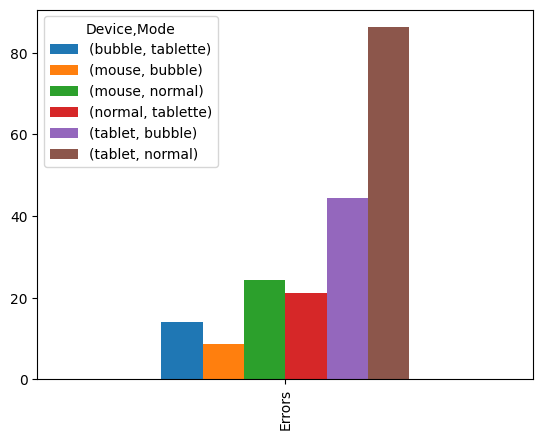

In [10]:
# plotting test
df.groupby(["Device", "Mode"])[["Errors"]].mean().T.plot.bar()

<AxesSubplot: >

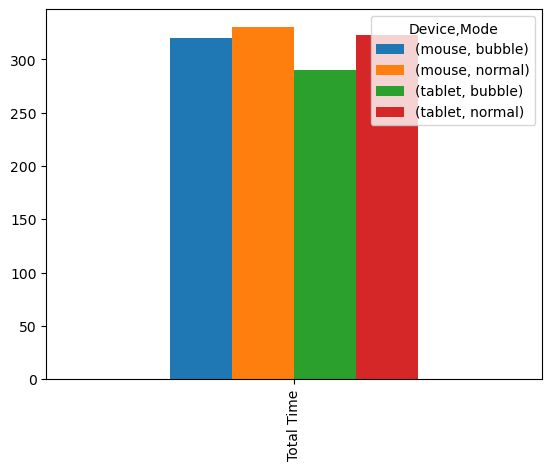

In [16]:
df.groupby(["Device", "Mode"])[["Total Time"]].mean().T.plot.bar()